# Damped oscillator

Visualise the impulse response function of a damped oscillator.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

## 1. Oscillator parameters:

In [2]:
mass = 1
k_const = 0.1
attenuation = -.2

In [3]:
def osc_parameters(m, k, b):
    if b != 0:
        tau0 = 2.*m/b
        print("Decay time: " + str(tau0))
    f0 = (1/2.*np.pi)*np.sqrt(k/m)
    print("Natural frequency: " + str('%.3f' % f0))
    fd = (1/2.*np.pi)*np.sqrt((k/m)*(1.-b*b/(4.*k*m)))
    print("Oscillation frequency: " + str('%.3f' % fd))

def g(tau, m, k, b):
    '''
    Impulse response of a damped oscillator.
    m = oscillator mass
    k = elastic constant
    b = attenuation factor
    '''
    f0 = (1/2.*np.pi)*np.sqrt(k/m)
    fd = (1/2.*np.pi)*np.sqrt((k/m)*(1.-b*b/(4.*k*m)))
    if b == 0:
        e = 1
    else:
        tau0 = 2.*m/b
        e = np.exp(tau/tau0)
    return e*np.sin(2.*np.pi*fd*tau)

## 2. Oscillator characteristics

In [4]:
osc_parameters(mass, k_const, attenuation)

Decay time: -10.0
Natural frequency: 0.497
Oscillation frequency: 0.471


## 3. Impulse response

* Search for 0 position in xtime array
* Generate impulse at the zero position
* Calculate impulse response

In [5]:
xtime = np.linspace(-5,50,1000)
prev = 0
for n, i in enumerate(xtime):
    if i*prev<0:
        # print(n) ## Print the impulse position in t
        zero_cross_position = n
    prev = i
        
inp = signal.unit_impulse(1000, zero_cross_position)
y = g(xtime, mass, k_const, attenuation)

y[0:zero_cross_position] = 0  # Cancel point before the excitation

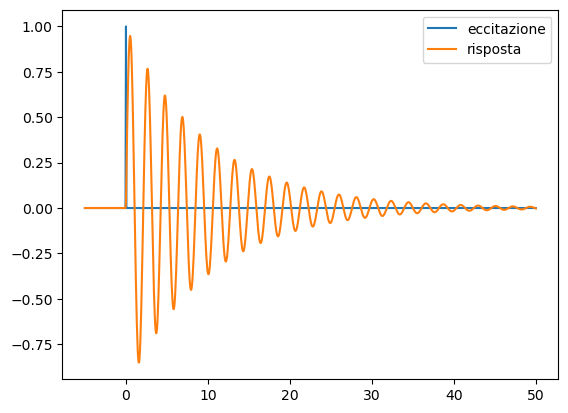

In [7]:
plt.plot(xtime, inp, label='impulse')  # Plot input impulse
plt.plot(xtime, y, label='response')    # Plot output response
plt.legend()

# Play with parameters to understand better the undelying mechanism!